In [1]:
import pennylane as qml
from pennylane import numpy as np
from matplotlib import pyplot as plt
import time
from supplementary_code import *

In [2]:
nq = 10
depth = int(nq/2)
dev = qml.device("default.qubit", wires= nq) 

In [3]:
Delta = 1.3
H = H_XXZ(Delta,wires=range(nq))

print(H)

  (1) [X0 X1]
+ (1) [Y0 Y1]
+ (1) [X1 X2]
+ (1) [Y1 Y2]
+ (1) [X2 X3]
+ (1) [Y2 Y3]
+ (1) [X3 X4]
+ (1) [Y3 Y4]
+ (1) [X4 X5]
+ (1) [Y4 Y5]
+ (1) [X5 X6]
+ (1) [Y5 Y6]
+ (1) [X6 X7]
+ (1) [Y6 Y7]
+ (1) [X7 X8]
+ (1) [Y7 Y8]
+ (1) [X8 X9]
+ (1) [Y8 Y9]
+ (1) [X9 X0]
+ (1) [Y9 Y0]
+ (1.3) [Z0 Z1]
+ (1.3) [Z1 Z2]
+ (1.3) [Z2 Z3]
+ (1.3) [Z3 Z4]
+ (1.3) [Z4 Z5]
+ (1.3) [Z5 Z6]
+ (1.3) [Z6 Z7]
+ (1.3) [Z7 Z8]
+ (1.3) [Z8 Z9]
+ (1.3) [Z9 Z0]


In [4]:
params = np.array([np.pi for _ in range(4*depth)])

In [5]:
@qml.qnode(dev)
def circuit(params, Delta, depth=depth, nq=nq):
    
    HVA_ansatz(params, Delta, depth, range(nq))
    
    return qml.expval(H)

In [6]:
cost_fn = lambda w: circuit(w, Delta=Delta, depth=depth, nq=nq)

In [7]:
start_time = time.time()    

steps = 200

optimizer = qml.AdamOptimizer(stepsize=0.5)
best_cost = cost_fn(params)
best_params = params

for j in range(steps+1):
    params2 = params
    params, cost = optimizer.step_and_cost(cost_fn, params)

    if cost < best_cost:
        best_params = params2
        best_cost = cost
        
    if j!=0 and j % 2 == 0:
        print(f"Cost at Step {j}: {cost}")

end_time = time.time()
print('Time taken: ', (end_time-start_time)/60, ' mins.')

Cost at Step 2: -7.541153426004863
Cost at Step 4: -3.2969693268090645
Cost at Step 6: -4.815914480683149
Cost at Step 8: -8.780662014707394
Cost at Step 10: -9.931076708278297
Cost at Step 12: -13.273114636038136
Cost at Step 14: -14.715570291357096
Cost at Step 16: -15.362930780686966
Cost at Step 18: -15.914065613360764
Cost at Step 20: -16.99661046794928
Cost at Step 22: -16.753937741176127
Cost at Step 24: -17.049851662046848
Cost at Step 26: -17.815717755984068
Cost at Step 28: -17.98074898012486
Cost at Step 30: -18.188701200013256
Cost at Step 32: -18.334258150561467
Cost at Step 34: -18.76331817301952
Cost at Step 36: -18.66224092278695
Cost at Step 38: -18.859394156748326
Cost at Step 40: -18.930259359123777
Cost at Step 42: -18.86264807021344
Cost at Step 44: -19.010115419292454
Cost at Step 46: -19.148426758899376
Cost at Step 48: -19.202491982490788
Cost at Step 50: -19.155953756441118
Cost at Step 52: -19.24151893827343
Cost at Step 54: -19.26167914827628
Cost at Step 56:

In [8]:
print(best_cost)

-19.48153066832288


In [9]:
print(cost_fn(best_params))

-19.48153066832288


In [10]:
print(np.array(best_params))

[ 5.00491901  3.14788587  1.64060019  4.97506481  0.90140291  6.26133422
  1.2420907   2.64053654  2.71628498  1.55122938  3.44160066  0.63278151
  2.35661581  2.96728036 -0.05339601  5.7459854   2.34827727  4.61245664
  4.30514462  2.4945041 ]


In [11]:
for i in range(1,10):
    
    corr = corr_function(i, best_params,Delta,depth, nq)
    
    print(i,np.abs(corr))

1 0.8011288578839756
2 0.3826823785079551
3 0.4030354672703824
4 0.3031675108851146
5 0.32004272713621806
6 0.3031675108851149
7 0.3082471162337197
8 0.3826823785079552
9 0.5392456102618443


In [12]:
# Time evolution

corr_t = []
t = []
i =  3
dt = 1/400

start_time = time.time()    
for step in range(401):
    
    t.append(dt*step)
    
    corr_dt = corr_function(i, best_params, Delta, depth, nq, perturbation='hamiltonian',timesteps=step)
    
    print(step,corr_dt)
    corr_t.append(corr_dt)
    
end_time = time.time()
print('Time taken: ', (end_time-start_time)/60, ' mins.')

0 -0.4030354672703824
1 -0.40384849088741737
2 -0.40463290302785915
3 -0.40538853153428367
4 -0.40611520901690734
5 -0.4068127728962783
6 -0.4074810654449406
7 -0.4081199338280611
8 -0.40872923014301055
9 -0.40930881145788395
10 -0.4098585398489495
11 -0.4103782824370167
12 -0.4108679114227124
13 -0.4113273041206542
14 -0.4117563429925103
15 -0.412154915678939
16 -0.4125229150303932
17 -0.41286023913678804
18 -0.41316679135601453
19 -0.41344248034129705
20 -0.41368722006738345
21 -0.4139009298555606
22 -0.41408353439748513
23 -0.4142349637778252
24 -0.4143551534957091
25 -0.41444404448496247
26 -0.41450158313313956
27 -0.4145277212993387
28 -0.41452241633078946
29 -0.41448563107821973
30 -0.41441733390998226
31 -0.41431749872494716
32 -0.4141861049641482
33 -0.4140231376211859
34 -0.4138285872513745
35 -0.41360244997963913
36 -0.4133447275071505
37 -0.4130554271167012
38 -0.412734561676817
39 -0.41238214964460174
40 -0.4119982150673186
41 -0.41158278758269057
42 -0.4111359024179444
43 

337 0.011375017563416523
338 0.01074342177251833
339 0.010098750039572862
340 0.009441230176029769
341 0.008771090564707262
342 0.008088560098577169
343 0.007393868119777269
344 0.006687244358871636
345 0.005968918874374063
346 0.005239121992550999
347 0.004498084247523598
348 0.003746036321679802
349 0.0029832089864196554
350 0.0022098330432445135
351 0.0014261392652082372
352 0.000632358338747252
353 -0.00017127919409595793
354 -0.0009845429930412375
355 -0.0018072029765131004
356 -0.0026390293781452245
357 -0.0034797928028292846
358 -0.004329264282294298
359 -0.005187215330202194
360 -0.006053417996746274
361 -0.006927644922734177
362 -0.007809669393148533
363 -0.008699265390163219
364 -0.009596207645608895
365 -0.010500271692870017
366 -0.011411233918202257
367 -0.012328871611456238
368 -0.013252963016196384
369 -0.014183287379201742
370 -0.015119624999336029
371 -0.01606175727577619
372 -0.017009466755586955
373 -0.01796253718063026
374 -0.018920753533798906
375 -0.019883902084561

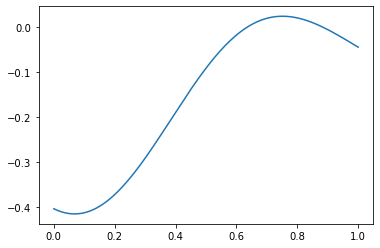

In [14]:
plt.plot(np.linspace(0,1,401),np.real(corr_t))

In [15]:
np.array(corr_t)

tensor([-4.03035467e-01, -4.03848491e-01, -4.04632903e-01,
        -4.05388532e-01, -4.06115209e-01, -4.06812773e-01,
        -4.07481065e-01, -4.08119934e-01, -4.08729230e-01,
        -4.09308811e-01, -4.09858540e-01, -4.10378282e-01,
        -4.10867911e-01, -4.11327304e-01, -4.11756343e-01,
        -4.12154916e-01, -4.12522915e-01, -4.12860239e-01,
        -4.13166791e-01, -4.13442480e-01, -4.13687220e-01,
        -4.13900930e-01, -4.14083534e-01, -4.14234964e-01,
        -4.14355153e-01, -4.14444044e-01, -4.14501583e-01,
        -4.14527721e-01, -4.14522416e-01, -4.14485631e-01,
        -4.14417334e-01, -4.14317499e-01, -4.14186105e-01,
        -4.14023138e-01, -4.13828587e-01, -4.13602450e-01,
        -4.13344728e-01, -4.13055427e-01, -4.12734562e-01,
        -4.12382150e-01, -4.11998215e-01, -4.11582788e-01,
        -4.11135902e-01, -4.10657600e-01, -4.10147928e-01,
        -4.09606937e-01, -4.09034685e-01, -4.08431235e-01,
        -4.07796656e-01, -4.07131022e-01, -4.06434413e-0